# LID task

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
country = 'TZ'
allowed_languages = ['en','sw','lg','rn','fr','so','ar','am','ti','rw']
whitelist = ['eng', 'swh', 'lug', 'run', 'fra', 'som', 'arb', 'amh', 'tir', 'kin']

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/{}_tweets_with_LID.csv'.format(country))

In [5]:
df.head(3)

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili


# LID with CLD3 and Franc

In [6]:
!pip install pycld3
!pip install pyfranc
!pip install pycountry
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import cld3
from pyfranc import franc

In [8]:
# Conduct token level LID

def tokenize_text(text):
  tokens = text.split()
  return tokens

# def get_token_lid_afrolid(tokens):
#   token_lid = []
#   for token in tokens:
#     predictions = cl.classify(token, max_outputs=1)
#     for lang in predictions:
#       if lang in whitelist:
#         token_lid.append(lang)
#   return token_lid

def get_token_lid_cld3(tokens):
  token_lid = []
  for token in tokens:
    predictions = cld3.get_language(token)
    for lang in predictions:
      language_code = predictions.language
      if language_code in allowed_languages:
        token_lid.append(language_code)
  return token_lid

def get_franc_prediction(text):
  predictions = franc.lang_detect(text, whitelist = whitelist)
  for lang in predictions:
    return predictions[0][0]

In [9]:
def get_majority_lid(lid_list):
    majority_lang = max(lid_list)

In [10]:
df['cld3_tokenlid'] = df['Text'].apply(lambda x: get_token_lid_cld3(tokenize_text(x)))
df['franc_tokenlid'] = df['Text'].apply(lambda x: get_franc_prediction(x))

In [11]:
df

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh
3,daladala,2022-09-24 18:21:32,1573739424382423043,Kuna huyu mtu ana hadithia hapa eti anamwaka m...,AsiahSalum,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh
4,daladala,2022-09-19 09:35:17,1571795051818192898,Hongera sana SuluhuSamia kwa Kupata Siti nzuri...,ExMayorUbungo,Dar es salaam,Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh
...,...,...,...,...,...,...,...,...,...,...,...
993,bajaj,2019-03-01 04:42:02,1101341804618690560,Tanzania Trade Fair 2019 participation of Baj...,beenakoshy,NaN,Swahili,unrecognised,French,"[fr, fr, fr, fr, en, en, en, en, en, en, en, en]",fra
994,bajaj,2019-03-01 04:37:31,1101340668473929728,Bajaj Electricals at the Tanzania trade fair 2...,beenakoshy,NaN,Swahili,English,French,"[en, en, en, en, en, en, en, en, en, en, en, e...",fra
995,bajaj,2018-12-21 07:38:29,1076019057890074624,In Dar Es Salaam The Business and Busiest Cit...,mtaliitravels,"Dar es Salaam, Tanzania",Swahili,English,English,"[en, en, en, en, en, en, en, en, en, en, en, e...",eng
996,bajaj,2018-07-18 14:49:14,1019594953532600320,Safari bora 🚗 huanza unapoendeshwa kwa Bajaj u...,MondoRide255,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh


In [12]:
max(df['cld3_tokenlid'][0])

'sw'

In [13]:
get_majority_lid(df['cld3_tokenlid'][0])

In [14]:
df['cld3_tokenlid_iso'] = df['cld3_tokenlid'].apply(lambda x: max(x) if x else None)
df.head(2)




,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw


In [15]:
# decode the ISO codes to language names for cld3

import pycountry

def get_language_name_cld3(code):
  try:
    lang = pycountry.languages.get(alpha_2=code)
    return lang.name
  except:
    return 'unrecognised'

# decode the ISO codes to language names for afrolid and franc

iso_langs_EA = {
    'eng': 'English',
    'swh': 'Swahili',
    'lug': 'Ganda',
    'run': 'Kirundi',
    'fra': 'French',
    'som': 'Somali',
    'arb': 'Arabic',
    'amh': 'Amharic',
    'tir': 'Tigrinya',
    'kin': 'Kinyarwanda'
}

def map_language(iso_code):
  return iso_langs_EA.get(iso_code, 'unrecognised')

# df['predict_name_afrolid'] = df['afrolid_tokenlid'].apply(map_language)
df['predict_name_cld3'] = df['cld3_tokenlid_iso'].apply(get_language_name_cld3)
df['predict_name_franc'] = df['franc_tokenlid'].apply(map_language)

In [16]:
df.head(3)

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw


In [17]:
from collections import Counter

def get_majority_lid(row):
    languages = [row['predict_name_afrolid'], row['predict_name_cld3'], row['predict_name_franc']]
    c = Counter(languages)
    majority_count = c.most_common()[0][1]
    if majority_count > 1:
        return c.most_common()[0][0]
    else:
        return 'undecided'

In [18]:
df['final_language'] = df.apply(get_majority_lid, axis=1)
df.head(3)

,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso,final_language
0,daladala,2023-02-08 07:49:38,1623227542218985473,Dar Es Salaam watu wana hasira sana ukimgusa ...,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw,Swahili
1,daladala,2023-01-31 13:00:19,1620406624908345344,Muonekano wa Kituo Kipya cha Daladala cha Kiny...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw,Swahili
2,daladala,2023-01-27 06:19:14,1618856135645356034,Lakini kumpisha mtu mzima kwenye seat ya dalad...,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili


<AxesSubplot:>

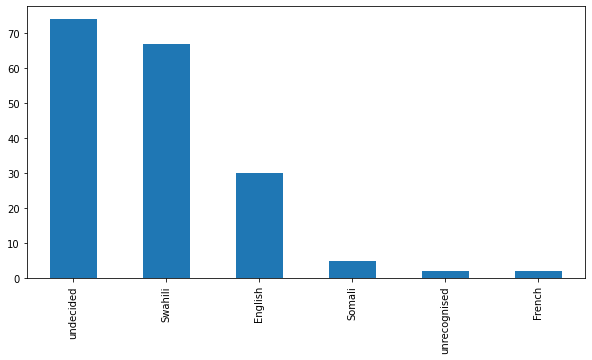

In [82]:
# find the language distribution of the final labels
df['final_language'].value_counts().plot.bar(figsize=(10,5), fontsize=10)

In [83]:
# find the username distribution 
df['Username'].value_counts()

TzPhones          14
BusesDaily        13
gadgetboxtz        8
DALALIMWANAMKE     8
SamakiOnline       5
                  ..
EngNyahucho        1
ITDPmx             1
brunokinyaga1      1
ummymwalimu        1
Sajjo              1
Name: Username, Length: 112, dtype: int64

In [48]:
# exclude tweets from the username BusWorldTZ

df = df[df['Username'] != 'BusWorldTZ']

In [49]:
len(df)

180

In [84]:
sample = df[df['final_language'] == 'undecided']

In [86]:
sample['Username'].value_counts()

BusesDaily         13
TzPhones           10
gadgetboxtz         7
Architect_Russ      4
owdenstz            3
ProfDoBad           3
KabanovRais         2
amo_iphone_         2
Grosvenor_MB        1
SamakiOnline        1
PetroKayanda8       1
dsarmanis           1
dailynewstz         1
tigerthedj          1
pvesterbacka        1
ypmjno1             1
becky_dale          1
beenakoshy          1
malimbika           1
kasiryesam10        1
ankali_mambi        1
miwasho0816         1
SouthernBuses       1
leepyne             1
TJMgidi             1
flyoverboi          1
humphreynyange      1
AyoubChakah         1
Anathi_Tshabe       1
Nichekitanzania     1
robertsylivesta     1
YudaSulePascha1     1
BusHighland         1
ITDPmx              1
Nkololotz           1
PlacidoMhaya        1
itsnkoba            1
mtaliitravels       1
Name: Username, dtype: int64

In [22]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [23]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub(r'\'s+', ' ', text)
    text = text.strip(' ') # removes all leading and trailing spaces in the text
    return text

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

token = ToktokTokenizer()
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def lemitizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):

    stop_words = set(stopwords.words("english"))

    words = token.tokenize(text)

    filtered = [w for w in words if not w in stop_words]

    return ' '.join(map(str, filtered))

In [37]:
import spacy

nlp = spacy.load('en_core_web_sm')

# define function to remove emojis
def remove_emojis(text):
    # define regex pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # other emoticons
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    # remove emojis using regex pattern
    return emoji_pattern.sub(r'', text)


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [42]:
# define function to remove named entities
def remove_entities(text):
    """
    Remove country, city names, or companies from text using spaCy.

    Args:
        text (str): Text to remove entities from.

    Returns:
        str: Text with entities removed.
    """
    doc = nlp(text)
    new_text = []
    for token in doc:
        if not (token.ent_type_ == "GPE" or token.ent_type_ == "LOC" or token.ent_type_ == "ORG"):
            new_text.append(token.text)
    return " ".join(new_text)

In [78]:
def remove_keywords(text):
    keywords = ['dar es salaam', 'iphone', 'tanzania', 'dar', 'es', 'salaam']
    for keyword in keywords:
        text = text.replace(keyword, '')
    return text

In [70]:
# Download the Swahili stop words CSV file from Kaggle
def remove_swahili_stopwords(text):
  # Open stop words file and split into a list
  with open('/content/drive/MyDrive/MIT/MIT 807 mini-dissertation/Data/swahili_stopwords.txt', 'r') as f:
    stop_words = f.read().split('\n')

  # Remove stop words from text
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  filtered_text = ' '.join(filtered_words)
  return filtered_text

In [79]:
def combine(new_df):  
  new_df['Text'] = new_df['Text'].apply(lambda x: clean_text(x))
  print(1)
  new_df['Text'] = new_df['Text'].apply(lambda x: lemitizeWords(x))
  print(2)
  new_df['Text'] = new_df['Text'].apply(lambda x: stopWordsRemove(x))
  print(3)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_emojis(x))
  print(4)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_entities(x))
  print(5)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_keywords(x))
  print(6)
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_swahili_stopwords(x))
  return new_df

In [80]:
df_new = combine(df)
df_new

<ipython-input-79-df3739378e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: clean_text(x))
<ipython-input-79-df3739378e6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: lemitizeWords(x))
<ipython-input-79-df3739378e6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

1
2
3
4


<ipython-input-79-df3739378e6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_entities(x))
<ipython-input-79-df3739378e6e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_keywords(x))


5
6


<ipython-input-79-df3739378e6e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text'] = new_df['Text'].apply(lambda x: remove_swahili_stopwords(x))


,key,Datetime,Tweet Id,Text,Username,Location,predict_name_afrolid,predict_name_cld3,predict_name_franc,cld3_tokenlid,franc_tokenlid,cld3_tokenlid_iso,final_language
0,daladala,2023-02-08 07:49:38,1623227542218985473,wana ukimgusa anakupa bonge tusi,fadhilikangusi,"Dar Es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw]",swh,sw,Swahili
1,daladala,2023-01-31 13:00:19,1620406624908345344,kinyerezi manispaa hiki uwezo ujenzi umetekele...,raphyrodrick,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, en, en, en, en, sw, sw, sw, s...",swh,sw,Swahili
2,daladala,2023-01-27 06:19:14,1618856135645356034,seat sio part maadili upande,DejohB,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili
3,daladala,2022-09-24 18:21:32,1573739424382423043,huyu mtu ana hadithia hapa hajawahi always huw...,AsiahSalum,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili
4,daladala,2022-09-19 09:35:17,1571795051818192898,suluhusamia sisi mbagala ubungo siti dirishani...,ExMayorUbungo,Dar es salaam,Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,bajaj,2019-03-01 04:42:02,1101341804618690560,trade fair participation bajaj electricals htt...,beenakoshy,NaN,Swahili,French,French,"[fr, fr, fr, fr, en, en, en, en, en, en, en, en]",fra,fr,French
994,bajaj,2019-03-01 04:37:31,1101340668473929728,bajaj electricals trade fair visit high commis...,beenakoshy,NaN,Swahili,English,French,"[en, en, en, en, en, en, en, en, en, en, en, e...",fra,en,undecided
995,bajaj,2018-12-21 07:38:29,1076019057890074624,locals use tri motorycycl bajaj go ahead time ...,mtaliitravels,"Dar es Salaam, Tanzania",Swahili,Somali,English,"[en, en, en, en, en, en, en, en, en, en, en, e...",eng,so,undecided
996,bajaj,2018-07-18 14:49:14,1019594953532600320,pakua app mondo ride httpstcocdhu3ivslx utueleze,MondoRide255,"Dar es Salaam, Tanzania",Swahili,Swahili (macrolanguage),Swahili,"[sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, sw, s...",swh,sw,Swahili


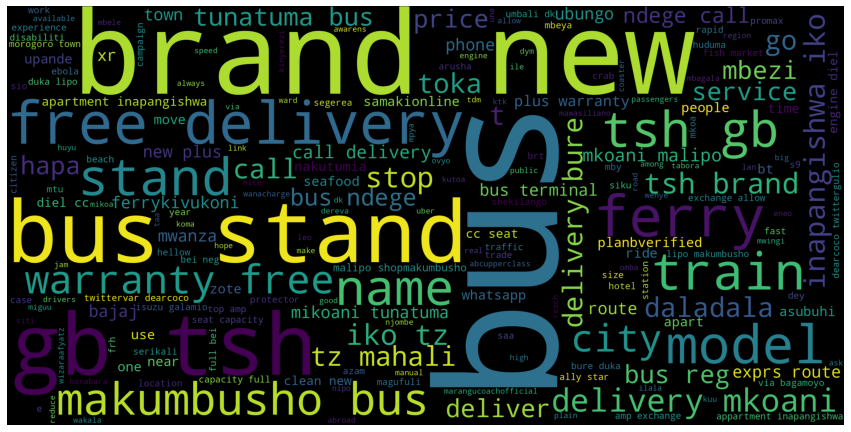

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=3000, height=1500).generate(text)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(" ".join(df_new['Text']))